### 3.6 手書き数字認識

In [15]:
import sys, os
print(os.getcwd()) # ここの親ディレクトリは"DeepLearning"であることがわかった

sys.path.append('../source_code') # `os.pardir`だけじゃなくて, `'../'`でも親ディレクトリを表せる
# 以上のコードで，importする際にファイルを検索するディレクトリ一覧に'source_code'を追加できた．
# これめちゃくちゃ大事

from dataset.mnist import load_mnist # load mnist関数の読み込み

c:\Users\hr102\Documents\python\DeepLearning\3_neural_network


In [16]:
# load_mnist関数を実行
(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False) # `\`はコードを改行しても続いていることをpythonに認識させるための記号

load_mnst()関数には3つの引数を設定できる．
* normalize：入力画像を0.0~1.0のあたいに正規化するかどうかを設定．これをFalseにすると，入力画像のピクセルは本の0~255のまま
* flatten：入力画像を平らにする(1次元配列にする)かどうか．Falseに設定すると入力画像は1*28*28の3次元配列として，Trueだと，784個の要素からなる1次元配列として格納される．
* one_hot_label：ラベルをone-hotとして格納するかどうかを設定する．

one-hot表現とは，正解となるラベルだけが１でそれ以外は０の配列．

In [17]:
# それぞれのデータの形状を出力

# 訓練用のデータの形状を確認
print(x_train.shape)
print(t_train.shape)

# テスト用のデータの形状を確認
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [18]:
# 1つのデータを取り出して，表示してみる．(サイトの人のまね)

import numpy as np
# 出力の折り返し設定を変更
np.set_printoptions(linewidth=150)

# 表示するデータ番号を指定
n = 0

# n番目の画像データを表示
print(x_train[n, 0])

# n番目のラベルデータを表示
print(t_train[n])

# 出力の折り返し設定を戻す．
np.set_printoptions(linewidth=75)

# 表示できなかった．．．

0
5


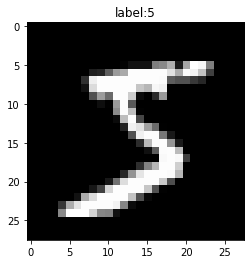

In [25]:
n = 0 # 表示するデータ番号を指定

import matplotlib.pyplot as plt
# 手書き文字を作図
plt.imshow(x_train[n].reshape((28, 28)), cmap='gray') # 手書き文字
plt.title('label:' + str(t_train[n])) # ラベル
plt.show()

In [27]:
# MNIST画像の表示(p74)
# 画像の表示にはPIL(Python Image Library)モジュールを使用する

import sys, os
sys.path.append('../source_code') # importの検索対象ファイルにsource_codeを追加
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False) # MNISTデータの読み込み

img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28) # 形状を元の画像サイズに変形
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


#### 3.6.2 ニューラルネットワークの推論処理

入力層784個，出力層10個，隠れ層は2つあり，一つ目は50個，2つ目は100個のニューロンを持つ．

In [ ]:
def get_data():
    (x_train, t_train), (x_test, t_test) = \
        load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = 